**Homework 7**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this assignment we'll look at the classic "cars" dataset. You can read about it here:
[link](https://vincentarelbundock.github.io/Rdatasets/doc/causaldata/auto.html)

In [2]:
cars=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/causaldata/auto.csv')
cars.head(3)

,rownames,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,1,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,0
1,2,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,0
2,3,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,0


At first, we'll just focus on finding a relationship between the `displacement` and `mpg` columns. 

In [3]:
disp=np.array(cars.displacement)
mpg=np.array(cars.mpg)

Let's take a look at them:

Text(0, 0.5, 'MPG')

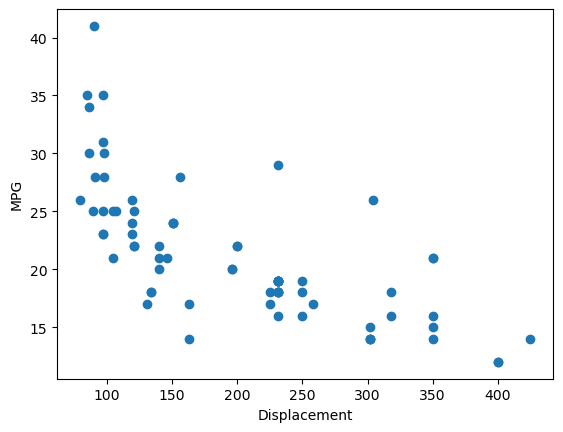

In [4]:
plt.scatter(disp, mpg)
plt.xlabel('Displacement')
plt.ylabel('MPG')

Problem 1.

Create a class that finds a linear model describing the relationship between arrays `X` and `y` (you may assume each are 1-dimensional). This model should be created using only the highest and lowest values in `X`, and the corresponding values in `y`.   

In [11]:
class MaxMinLinearRegression():
    def __init__(self):
        '''No init function needed,
        since there are no hyperparameters'''
        pass
    
    def fit(self,X,y): 
        '''stores the slope and intercept 
        for the model defined by X and y'''
        max_i = np.argmax(X)
        min_i = np.argmin(X)

        self.coef= (y[max_i] - y[min_i]) /(X[max_i] - X[min_i])
        # y = mx + b ======> b = mx/y
        # solve for b when x = 0
        self.intercept= y[min_i]
        
    def predict(self,x):
        return x * self.coef + self.intercept

If you did this problem correctly, the following code will create a linear model that can predict `mpg` from `disp`. 

In [12]:
lin_mod1=MaxMinLinearRegression()
lin_mod1.fit(disp,mpg)

To use your model to predict the `mpg` of an unknown car with `disp=200`, you would run this code:

In [13]:
lin_mod1.predict(200)

19.063583815028903

Run this to visualize your model's predictions, as compared to the actual:

Text(0, 0.5, 'MPG')

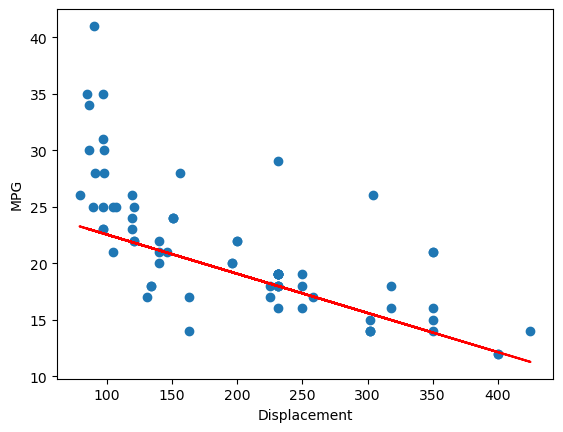

In [14]:
plt.scatter(disp,mpg)
plt.plot(disp,lin_mod1.predict(disp),'-r')
plt.xlabel('Displacement')
plt.ylabel('MPG')

Calculate the RSS of `lin_mod1`.

In [16]:
preds = lin_mod1.predict(disp)
RSS1= np.sum(mpg - preds)**2
RSS1

25077.37699221491

Problem 2.

Create a class that finds a linear model describing the relationship between an array `X` of shape (num_observations,num_features) and a 1-dimensional array `y`, that minimizes the RSS. 

In [ ]:
class LinearRegression():
    def __init__(self):
        pass
    
    def fit(self,X,y): 
        '''stores the slope and intercept 
        for the model defined by X and y'''
        #YOUR CODE HERE
        self.intercept=#YOUR CODE HERE
        self.coef=#YOUR CODE HERE
        
    def predict(self,x):
        '''x is expected to have shape 
        (num_test_obs,num_feats)'''
        return #YOUR CODE HERE

To build a model to predict `mpg` from `disp`, we'll have to convert `disp` into an array of the correct shape:

In [ ]:
X=disp[:,np.newaxis]

We now build the model, and fit it to the data:

In [ ]:
lin_mod2=LinearRegression()
lin_mod2.fit(X,mpg)

To use this model to make a prediction on an unknown car with `disp=200`, you'll need to feed that value in as an array, rather than a single number.

In [ ]:
#lin_mod2.predict(200) won't work
lin_mod2.predict([200]) #Do this instead

Run this code to visualize your model. Does it look better than the previous model?

In [ ]:
plt.scatter(disp,mpg)
plt.plot(disp,lin_mod2.predict(X),'-r')
plt.xlabel('Displacement')
plt.ylabel('MPG')

Calculate the RSS of `lin_mod2`.

In [ ]:
RSS2=#YOUR CODE HERE
RSS2

Problem 3.

We'll now bring in more features to see if we can predict `mpg` more accurately:

In [ ]:
wt=np.array(cars.weight)
gr=np.array(cars.gear_ratio)

We build a feature matrix using displacement, weight, and gear ratio:

In [ ]:
DWG=np.array([disp,wt,gr]).T

Now create a new linear model to predict `mpg` from the feature matrix `DWG`.

In [ ]:
lin_mod3=#YOUR CODE HERE
lin_mod3.fit(#YOUR CODE HERE)

Predict the `mpg` for a car with a displacement of 200, weight equal to 3000, and gear ratio 3.

In [ ]:
prediction=#YOUR CODE HERE
prediction

Calculate the RSS of `better_mod`.

In [ ]:
RSS3=#YOUR CODE HERE
RSS3